In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing import image

In [ ]:
img=cv.imread("training_set\cats\cat.1.jpg")

In [ ]:
img.shape

(280, 300, 3)

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory("training_set/",
                                       target_size=(200,200),
                                        batch_size=3,
                                        class_mode="binary"
                                        
                                       )

Found 8000 images belonging to 2 classes.


In [ ]:
validation_dataset=train.flow_from_directory("Validation_data/",
                                       target_size=(200,200),
                                        batch_size=3,
                                        class_mode="binary"
                                        
                                       )

Found 10 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
model=keras.Sequential([
    keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3),activation="relu"),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
    
    
])

In [ ]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [ ]:
model.fit(train_dataset,steps_per_epoch=3,
         epochs=20,validation_data=validation_dataset)

Epoch 1/20
3/3 [==============================] - 2s 379ms/step - loss: 4.1328 - accuracy: 0.2222 - val_loss: 0.7371 - val_accuracy: 0.2000
Epoch 2/20
3/3 [==============================] - 1s 269ms/step - loss: 0.8694 - accuracy: 0.4444 - val_loss: 0.7143 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 1s 277ms/step - loss: 0.6694 - accuracy: 0.6667 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 1s 269ms/step - loss: 0.7128 - accuracy: 0.3333 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 1s 267ms/step - loss: 0.7068 - accuracy: 0.4444 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 1s 259ms/step - loss: 0.7551 - accuracy: 0.3333 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 1s 271ms/step - loss: 0.6725 - accuracy: 0.6667 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 8/20
3/3 [====

In [ ]:
dir_path='test_set'

In [ ]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

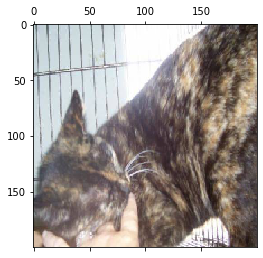

1/1 [==============================] - 0s 28ms/step
CAT


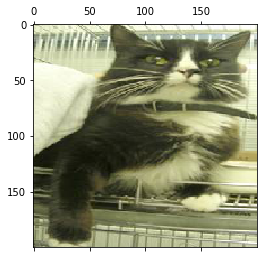

1/1 [==============================] - 0s 29ms/step
DOG


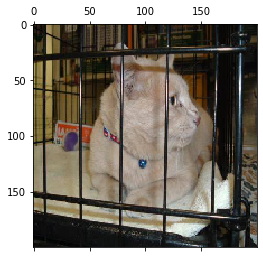

1/1 [==============================] - 0s 26ms/step
CAT


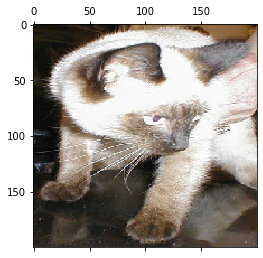

1/1 [==============================] - 0s 25ms/step
DOG


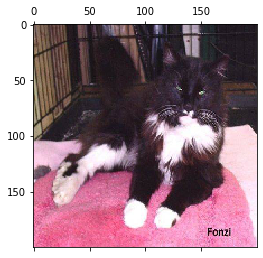

1/1 [==============================] - 0s 25ms/step
DOG


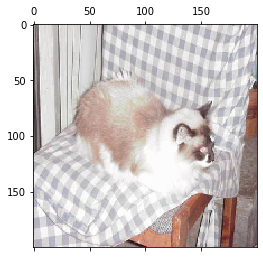

1/1 [==============================] - 0s 27ms/step
DOG


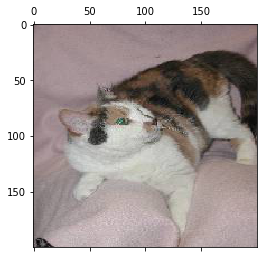

1/1 [==============================] - 0s 27ms/step
CAT


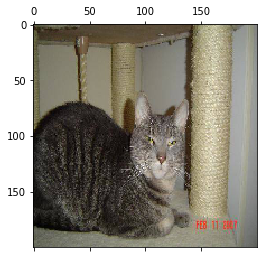

1/1 [==============================] - 0s 31ms/step
DOG


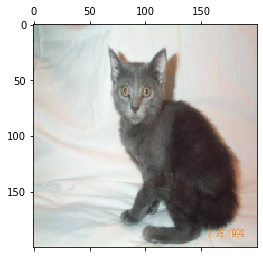

1/1 [==============================] - 0s 31ms/step
DOG


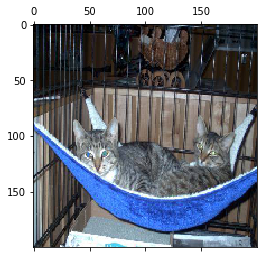

1/1 [==============================] - 0s 31ms/step
DOG


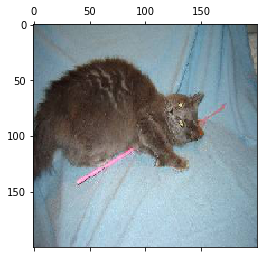

1/1 [==============================] - 0s 29ms/step
DOG


In [ ]:
count=0
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.matshow(img)
    plt.show()
    x=np.array(img)
    
    x=np.expand_dims(x,axis=0)
    
    
  
    images=np.vstack([x])
    val=model.predict(images)
    
    if val>0.5:
        print("DOG")
    else:
        print("CAT")
    
    count+=1
    if count>10:
        break